In [1]:
%matplotlib inline
import sys
sys.path.append('../..')
from analysis.analysistools import make_feature_list, remove_feature_from_list, get_models, plot_ftr_importance

# Feature Importance -- Adjusting Boosting parameters

There are some important parameters in the boosting routine that were set by default to inappropriate values. So, in the following runs, we changed:

    1. iterations 1000 -> 200
    2. num leaves 31 -> 7
    3. n data per leaf 1 -> 5000

In [2]:
features = make_feature_list()
features = remove_feature_from_list(features,['lat','lon','year'])
base_path = "/swot2/features/MODEL_RUNS/03_CHANGE_PARAMS/train-test-split"
models = get_models(base_path)

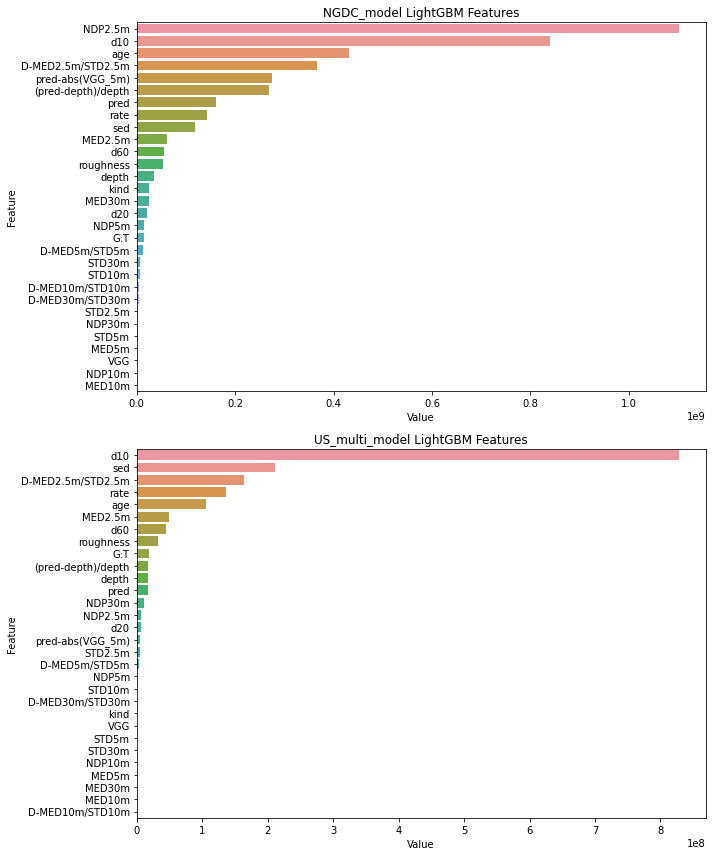

In [3]:
plot_ftr_importance(models,features)

## 500 rounds
I increased the number of iterations up to 500. I don't know what is ideal, but if you perform more iterations, you can always choose to use a smaller number when testing data.

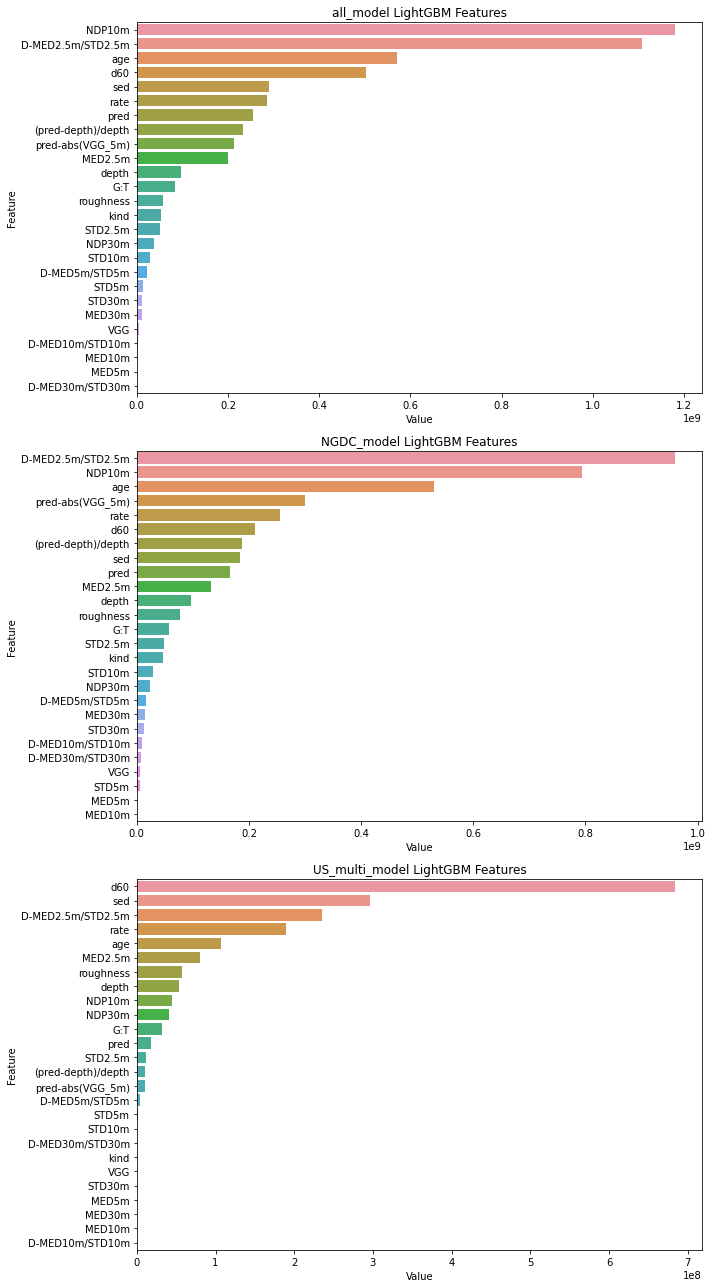

In [4]:
features = remove_feature_from_list(features,['lat','lon','year','d10','d20','NDP2.5m','NDP5m'])
base_path = "/swot2/features/MODEL_RUNS/07_500_ROUNDS/train-test-split"
models = get_models(base_path)
plot_ftr_importance(models,features)

## Overfitting Parameters tuning
We'll start adjusting some important parameters one at a time. The lightgbm docs suggest tinkering with some of the following parameters to deal with overfitting:

    1. feature_fraction
    2. bagging_fraction and bagging_freq
    3. extra_trees (True/False)
    4. max_bins

In all following models, 7 features have been removed.

## Feature fraction = 0.8

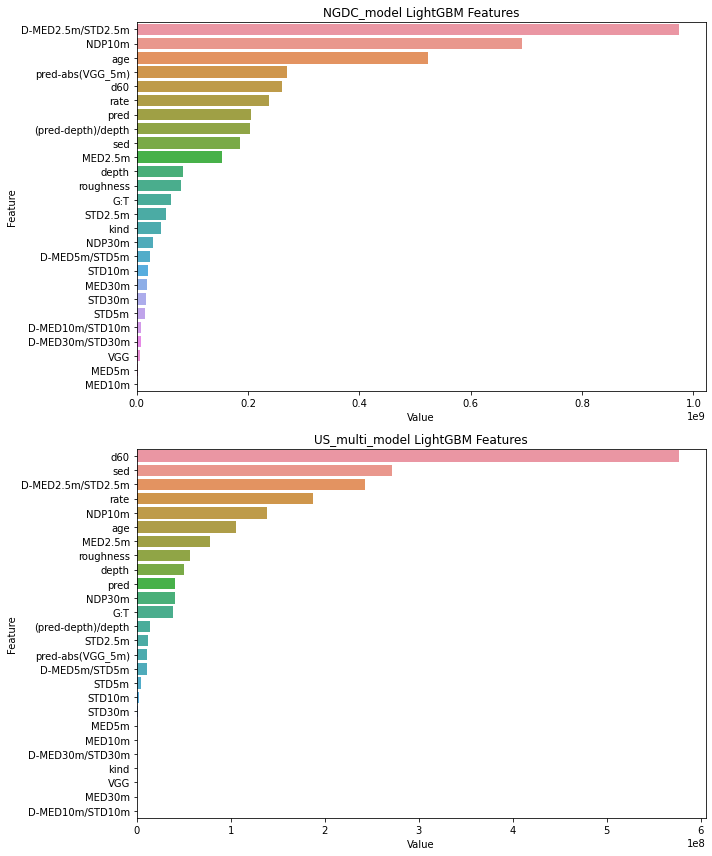

In [5]:
features = make_feature_list()
features = remove_feature_from_list(features,['lat','lon','year','d10','d20','NDP2.5m','NDP5m'])
base_path = "/swot2/features/MODEL_RUNS/08_FEATURE_FRACTION/train-test-split"
models = get_models(base_path)
plot_ftr_importance(models,features)

## Bagging fraction and frequency
Bagging fraction = 0.8, frequency = 25

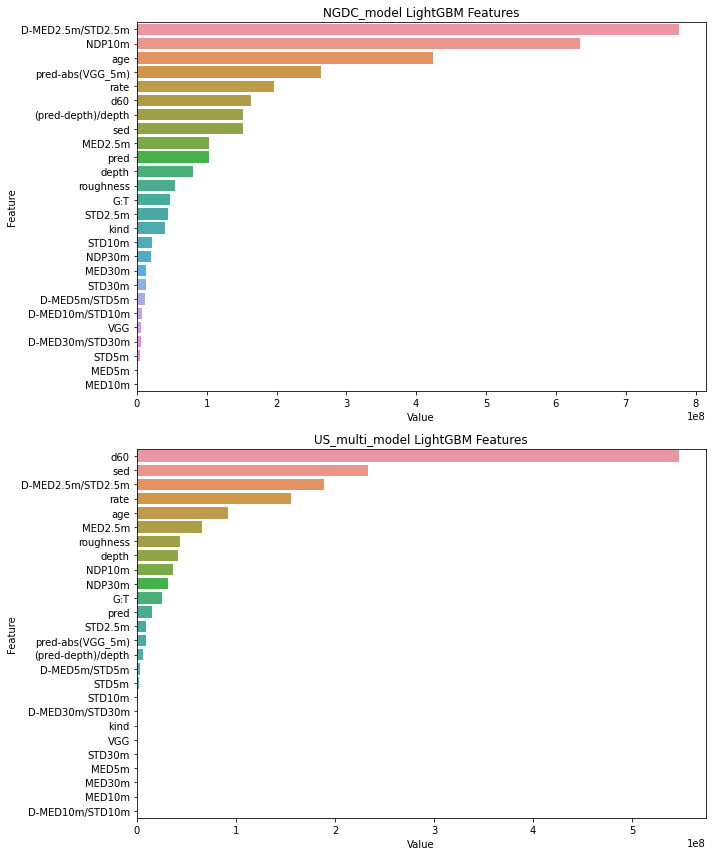

In [7]:
base_path = "/swot2/features/MODEL_RUNS/09_BAGGING_FRACTION/train-test-split"
models = get_models(base_path)
plot_ftr_importance(models,features)

## Extra trees = true

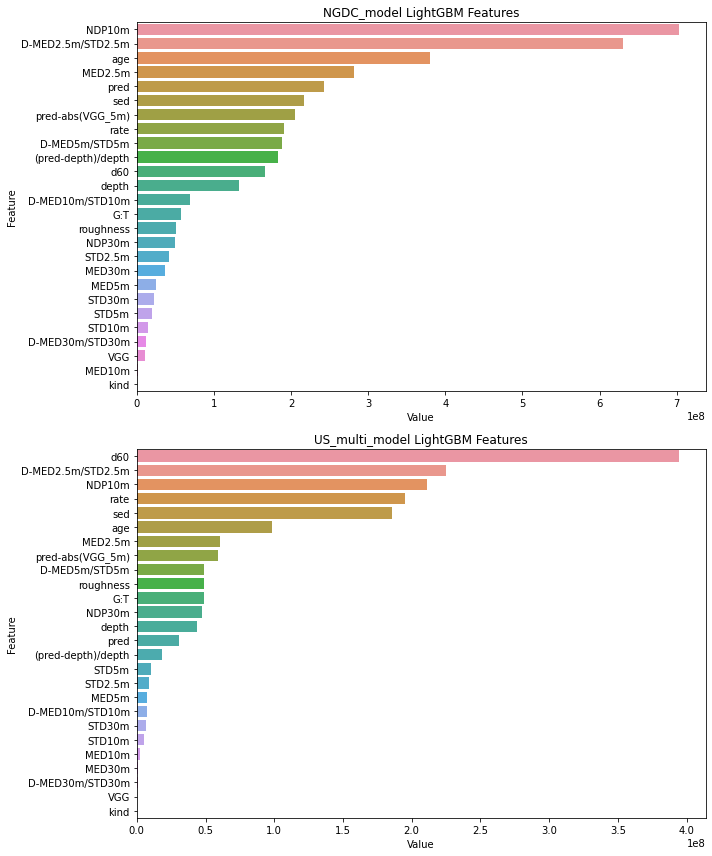

In [8]:
base_path = "/swot2/features/MODEL_RUNS/10_EXTRA_TREES/train-test-split"
models = get_models(base_path)
plot_ftr_importance(models,features)

## Max bins = 127
default is max bins = 255, so basically halving the number of bins

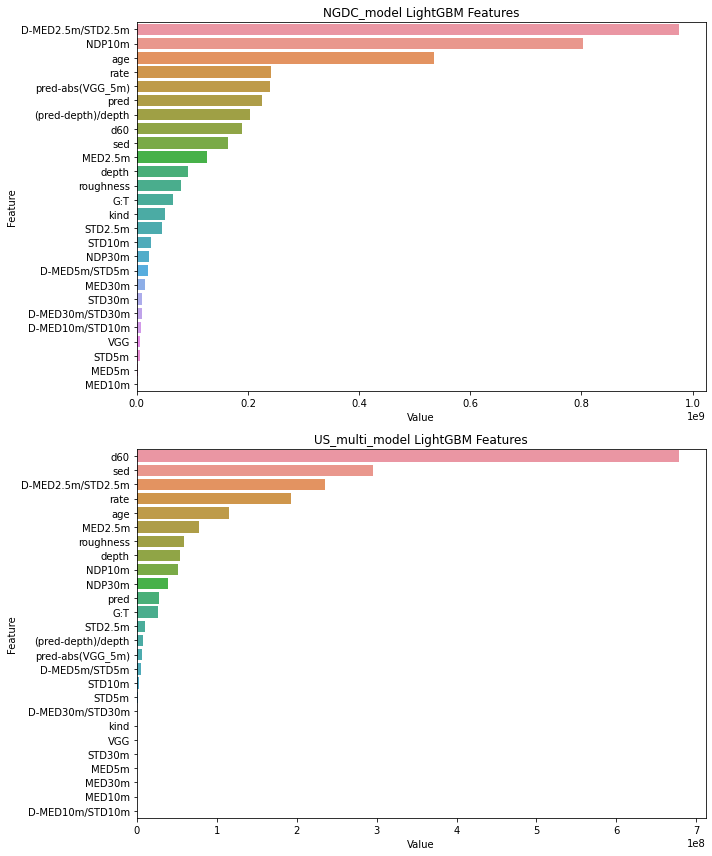

In [9]:
base_path = "/swot2/features/MODEL_RUNS/11_MAX_BINS/train-test-split"
models = get_models(base_path)
plot_ftr_importance(models,features)

## Learning rate and L2 regularization
Here's a little mini-test I needed to run, there are three model runs. First, I removed NDP30 which is sort of the last of the "spatial" features that I think would bias the model in favor of lat/lon it has already seen.

The next test is to increase the learning rate to 0.05. Initially, this was set at 0.01 and there were 1000 iterations. When I decreased the number of iterations to 500, I should've increased the learning rate.

Finally, I added L2 regularization to the cost function with lambda_l2 = 1.0

I'm not sure how these latter two tests will affect the feature importance.

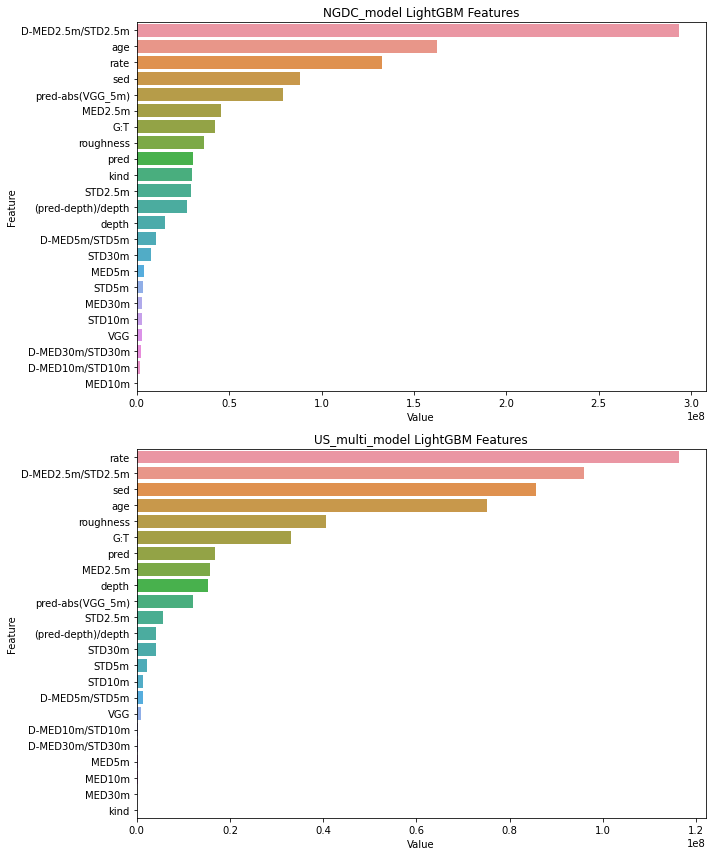

In [10]:
features = make_feature_list()
features = remove_feature_from_list(features,['lat','lon','year','d10','d20','d60','NDP2.5m','NDP5m','NDP10m','NDP30m'])
base_path = "/swot2/features/MODEL_RUNS/13_NO_NDP30/learning_rate"
models = get_models(base_path)
plot_ftr_importance(models,features)

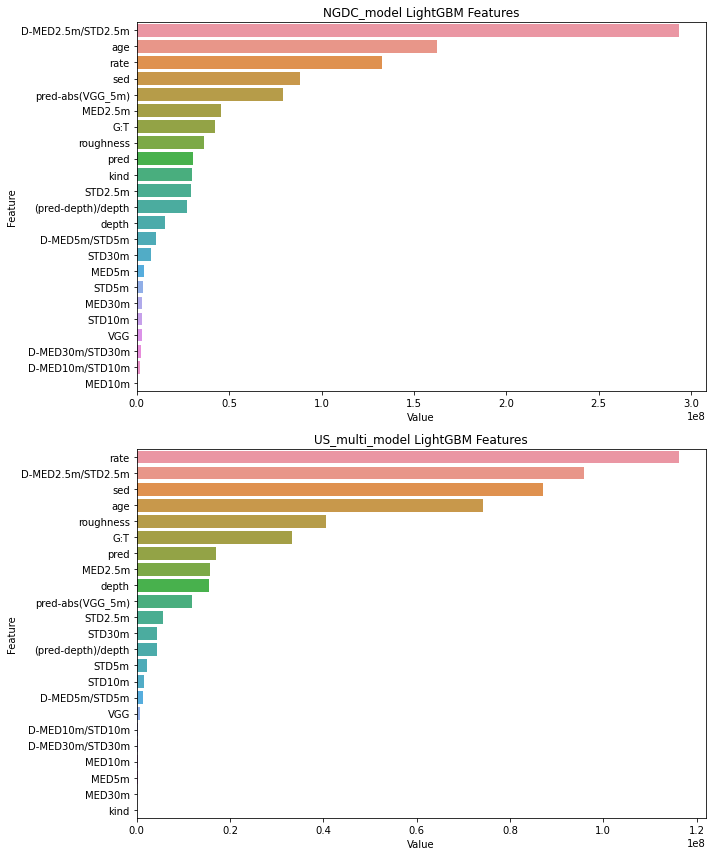

In [11]:
base_path = "/swot2/features/MODEL_RUNS/13_NO_NDP30/lambda_l2"
models = get_models(base_path)
plot_ftr_importance(models,features)